# CSE 6369 - Spring 2023 - Homework 2 (Deep-Q-Network)


## Student Name:


## Student ID: 

# Install packages

In [1]:
!pip install gymnasium==0.27.1 -q
!pip install gymnasium[box2d] -q
!pip install moviepy -q
!pip install -U kora -q

# Import libraries

In [2]:
import pickle
import random
import argparse
import moviepy
import matplotlib.pyplot as plt
import seaborn as sns
# from kora.drive import upload_public
# from google.colab import drive

# drive.mount('/content/gdrive')
# %cd gdrive/MyDrive/hw2/

from learning_algorithms import DQNTrainer
from utils import seed_everything

# Train an agent

In [4]:
# set simulation parameters
params = {
    'env_name': 'CartPole-v1',
    'rng_seed': 6369,
    'n_episode': 350,
    'rm_cap': 8192,
    'batch_size': 128,
    'hidden_dim': 128,
    'init_epsilon': 0.9,
    'min_epsilon': 0.05,
    'epsilon_decay': 0.99,
    'gamma': 0.99,
    'tau': 0.005,
    'lr': 3e-3,
    'exp_name': 'CartPole_v1_t0'
}

# Seed RNGs
seed_everything(params['rng_seed'])

# Train agent
trainer = DQNTrainer(params)
trainer.run_training_loop()

# Display Video

In [5]:
# (ref: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive)
# Upload video
url = upload_public('CartPole/rl-video-episode-0.mp4')
# Then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

NameError: name 'upload_public' is not defined

# Visualize learning curve

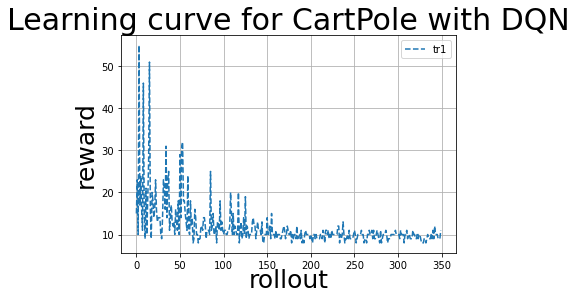

In [6]:
# (ref: http://rail.eecs.berkeley.edu/deeprlcourse/static/misc/viz.pdf)
file_name = params['exp_name'] + '.pkl'
with open(file_name, 'rb') as f:
    ro_reward = pickle.load(f)

# Plot the data
sns.lineplot(data=ro_reward, linestyle='--', label='tr1')
plt.xlabel('rollout', fontsize=25, labelpad=-2)
plt.ylabel('reward', fontsize=25)
plt.title('Learning curve for CartPole with DQN', fontsize=30)
plt.legend()
plt.grid()
plt.show()

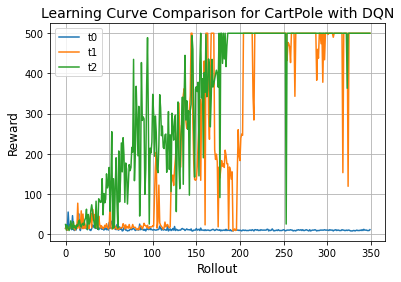

In [36]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the rewards data from three different trials
file_names = ['CartPole_v1' + '_t0.pkl', 'CartPole_v1' + '_t1.pkl', 'CartPole_v1' + '_t2.pkl']
rewards_data = []

for file_name in file_names:
    with open(file_name, 'rb') as f:
        rewards = pickle.load(f)
        rewards_data.append(rewards)

# Plot the data for each trial
labels = ['t0', 't1', 't2']
for i, rewards in enumerate(rewards_data):
    plt.plot(rewards, linestyle='-', label=labels[i])

plt.xlabel('Rollout', fontsize=12)
plt.ylabel('Reward', fontsize=12)
plt.title('Learning Curve Comparison for CartPole with DQN', fontsize=14)
plt.legend()
plt.grid()
plt.show()


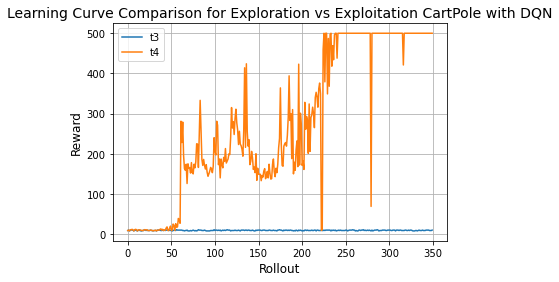

In [34]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the rewards data from two different trials
file_names = ['CartPole_v1' + '_t3.pkl', 'CartPole_v1' + '_t4.pkl']
rewards_data = []

for file_name in file_names:
    with open(file_name, 'rb') as f:
        rewards = pickle.load(f)
        rewards_data.append(rewards)

# Plot the data for each trial
labels = ['t3', 't4']
for i, rewards in enumerate(rewards_data):
    plt.plot(rewards, linestyle='-', label=labels[i])

plt.xlabel('Rollout', fontsize=12)
plt.ylabel('Reward', fontsize=12)
plt.title('Learning Curve Comparison for Exploration vs Exploitation CartPole with DQN', fontsize=14)
plt.legend()
plt.grid()
plt.show()
